<a href="https://colab.research.google.com/github/Lufec/ML_Pima_Indians/blob/main/2_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pima Indians Diabetes - MLP



## Importando bibliotecas


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
import numpy as np
import random
import statistics 
import scipy.stats


## Importando dados de treino e teste
Importando os dados do banco de dados Pima de treino 80% e teste 20% definidos na lista passada

In [ ]:
dfTreino = pd.read_csv("/content/dfTreino20.csv")
dfTeste = pd.read_csv("/content/dfTeste20.csv")
print(dfTreino['Diagnóstico'].value_counts())
print(dfTeste['Diagnóstico'].value_counts())

2    400
1    400
Name: Diagnóstico, dtype: int64
2    100
1    100
Name: Diagnóstico, dtype: int64


## Separando X e Y dos dados

In [ ]:
x_train = dfTreino.drop(columns = "Diagnóstico")
y_train = dfTreino['Diagnóstico']
x_test =  dfTeste.drop(columns = "Diagnóstico")
y_test =  dfTeste['Diagnóstico']

In [ ]:
xtrain_mean = x_train.mean()
xtrain_std = x_train.std()

In [ ]:
x_train = (x_train-xtrain_mean)/xtrain_std
x_test = (x_test-xtrain_mean)/xtrain_std

In [ ]:
x_test

,Gravidez,Glicose,Pressão,Pele,Insulina,Massa Corpórea,Genealogia,Idade
0,-1.131532,-0.899148,0.754030,-1.846328,-0.967803,-1.186050,-0.567773,-1.062927
1,1.812598,1.146745,0.924673,-0.333245,-0.440636,-0.820948,-0.868999,1.811892
2,-0.248293,-1.346687,-0.440470,0.008629,-0.717248,-0.207577,0.335902,-0.793413
3,-0.542706,-0.227839,-0.099184,-0.333245,-0.440636,-2.003878,0.938352,3.428978
4,-0.542706,-0.547510,1.607244,-0.333245,-0.440636,1.369662,0.938352,1.811892
...,...,...,...,...,...,...,...,...
195,1.518185,1.242647,1.265959,0.379620,0.431277,-0.426638,-0.567773,1.362702
196,-0.248293,-1.538489,-1.976256,0.255956,-0.922247,-0.339014,-0.868999,-0.703575
197,0.929359,-0.547510,0.583387,0.132292,0.431277,0.376585,1.842028,0.823673
198,1.223772,0.219700,-0.099184,0.379620,0.431277,-0.061537,-0.567773,0.464321


Objetivo: escolher a melhor estrutura de cada otimizador com base no conjunto de treino.
Etapa I) Manter estrutura de neurônios e ativação (relu) constante, modificar demais parâmetros (alpha, learning rate init, beta1, beta2, epsilon)

Teste I)  Mantendo a mesma estrutura de camadas internas (hidden layer sizes), ativação (relu), fora testado várias combinações de parâmetros para os três métodos de otimização: Adam, SGD e LBFGS. O critério de seleção será baseado nos algoritmos que apresentarem maior acurácia e precisão em repetidos testes.
* Critério de parada: mudança da convergência ao resultado ser menor que 1*10^-4 ou não apresentar aumento na convergência em 20 testes seguidos, a partir de dados de validação de 20% do conjunto de treino (ou seja, 15% dos dados totais).

* Para Adam (Adaptive Momentum Estimation), foram modificados os seguintes parâmetros: Taxa de penalidade (alpha), taxa de aprendizado inicial (learning rate init), coeficientes beta 1, beta 2 e epsilon.


* ### Adam

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'activation':['relu','tanh','logistic'],'solver':['adam'], 'hidden_layer_sizes':[(8,8),(8,8,8),(8)], 'max_iter':[200,500,1000],
              'early_stopping':[True],'validation_fraction':[0.2],
              'shuffle':[True],'tol':[1e-1,1e-2,1e-3,1e-4,1e-5],'n_iter_no_change':[10,20,30,50]
}

mlp = MLPClassifier()
mlp1a = GridSearchCV(mlp, parameters)
mlp1a.fit(x_train,y_train)
mlp1a.best_params_

In [ ]:
mlp1a.best_params_

In [ ]:
print("Treino\n")
predictions = mlp1a.predict(x_train)
print(confusion_matrix(y_train,predictions))
print(classification_report(y_train,predictions))
print("\nTeste\n")
predictions = mlp1a.predict(x_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

Estrutura escolhida para próximos testes: número 2.

* ### SGD (Stochastic Gradient Descent): os parâmetros modificados foram: taxa de penalidade (alpha), taxa de aprendizado inicial, método de taxa de aprendizado (constante ou adaptativo neste caso) e momentum.




In [ ]:
mlp2 = MLPClassifier(solver = 'sgd',hidden_layer_sizes=(9,9),alpha = 1.0,
                     learning_rate = 'adaptive', learning_rate_init = 0.8,
                     verbose  = False,tol = 1e-4,
                     momentum = 0.9, nesterovs_momentum = True, n_iter_no_change = 20,
                     max_iter=1000, early_stopping= True, validation_fraction= 0.2)
                     
mlp2.fit(x_train, y_train.values.ravel())
mlp2.score(x_train, y_train.values.ravel())

0.88625

In [ ]:
mlp2 = MLPClassifier(solver = 'sgd',hidden_layer_sizes=(9,9),alpha = 0.8,
                     learning_rate = 'constant', learning_rate_init = 0.8,
                     verbose  = False,tol = 1e-4,
                     momentum = 0.9, nesterovs_momentum = True, n_iter_no_change = 20,
                     max_iter=1000, early_stopping= True, validation_fraction= 0.2)
                     
mlp2.fit(x_train, y_train.values.ravel())
mlp2.score(x_train, y_train.values.ravel())

0.89

In [ ]:
mlp2 = MLPClassifier(solver = 'sgd',hidden_layer_sizes=(8,8,8),alpha = 1.0,
                     learning_rate = 'adaptive', learning_rate_init = 0.8,
                     verbose  = False,tol = 1e-4,
                     momentum = 0.8, nesterovs_momentum = False, n_iter_no_change = 20,
                     max_iter=1000, early_stopping= True, validation_fraction= 0.2)
                     
mlp2.fit(x_train, y_train.values.ravel())
mlp2.score(x_train, y_train.values.ravel())

0.88

Estrutura escolhida: número 3.

* Para LBFGS (Limited-Memory BFGS), além de não usar o conjunto de validação, só possui uma variável relativo à ela, que é o número máximo de chamadas da função de perda.

In [ ]:
mlp3 = MLPClassifier(solver = 'lbfgs',hidden_layer_sizes=(9,9), max_iter=4000, max_fun = 15000)
mlp3.fit(x_train, y_train.values.ravel())
mlp3.score(x_train, y_train.values.ravel())

0.995

Estrutura automaticamente escolhida.

Teste II): Diferentes Estruturas da rede de neurônios

* Adam

In [ ]:
mlp1 = MLPClassifier(solver = 'adam',hidden_layer_sizes=(10,10), max_iter=1000, early_stopping= True, validation_fraction= 0.2,
                     alpha = 1.0, learning_rate_init = 0.05, 
                     shuffle = True, tol = 1e-4, verbose = False, beta_1 = 0.8,
                     beta_2 = 0.9, epsilon = 1e-8,  n_iter_no_change = 20)



mlp1.fit(x_train, 
         y_train.values.ravel())
mlp1.score(x_train, y_train.values.ravel())

0.9075

In [ ]:
mlp1 = MLPClassifier(solver = 'adam',hidden_layer_sizes=(16,8,8), max_iter=1000, early_stopping= True, validation_fraction= 0.2,
                     alpha = 1.0, learning_rate_init = 0.05, 
                     shuffle = True, tol = 1e-4, verbose = False, beta_1 = 0.8,
                     beta_2 = 0.9, epsilon = 1e-8,  n_iter_no_change = 20)



mlp1.fit(x_train, 
         y_train.values.ravel())
mlp1.score(x_train, y_train.values.ravel())

0.9075

Estrutura escolhida: número 2



* SGD

In [ ]:
mlp2 = MLPClassifier(solver = 'sgd',hidden_layer_sizes=(9,9),alpha = 0.1,
                     learning_rate = 'adaptive', learning_rate_init = 0.8,
                     verbose  = False,tol = 1e-4,
                     momentum = 0.8, nesterovs_momentum = True, n_iter_no_change = 20,
                     max_iter=1000, early_stopping= True, validation_fraction= 0.2)
                     
mlp2.fit(x_train, y_train.values.ravel())
mlp2.score(x_train, y_train.values.ravel())

0.92875

In [ ]:
mlp2 = MLPClassifier(solver = 'sgd',hidden_layer_sizes=(16,16,8),alpha = 0.1,
                     learning_rate = 'adaptive', learning_rate_init = 0.8,
                     verbose  = False,tol = 1e-4,
                     momentum = 0.8, nesterovs_momentum = True, n_iter_no_change = 20,
                     max_iter=1000, early_stopping= True, validation_fraction= 0.2)
                     
mlp2.fit(x_train, y_train.values.ravel())
mlp2.score(x_train, y_train.values.ravel())

0.9

Estrutura escolhida: número 2.

### Testes usando os dados de treino

* Adam

In [ ]:
mlp1 = MLPClassifier(solver = 'adam',hidden_layer_sizes=(16,8,4), max_iter=1000, early_stopping= False, validation_fraction= 0.2,
                     alpha = 0.1, learning_rate_init = 0.05, 
                     shuffle = True, tol = 1e-4, verbose = False, beta_1 = 0.8,
                     beta_2 = 0.9, epsilon = 1e-4,  n_iter_no_change = 50)


mlp1.fit(x_train, 
         y_train.values.ravel())
print(mlp1.n_iter_)
predictions1 = mlp1.predict(x_test)
print(confusion_matrix(y_test,predictions1))
print(classification_report(y_test,predictions1))

193
[[88 12]
 [24 76]]
              precision    recall  f1-score   support

           1       0.79      0.88      0.83       100
           2       0.86      0.76      0.81       100

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200



* SGD

In [ ]:
mlp2 = MLPClassifier(solver = 'sgd',hidden_layer_sizes=(10,10,10),alpha = 0.01,
                     learning_rate = 'adaptive', learning_rate_init = 0.01,
                     verbose  = False, tol = 1e-4, warm_start = True,
                     momentum = 0.9, nesterovs_momentum = True, n_iter_no_change = 50,
                     max_iter=100000, early_stopping= False, validation_fraction= 0.2)
for i in range(300): #numero de ciclos aproximadamente ótimo para essa solução
  mlp2.partial_fit(x_train, y_train.values.ravel(),[1., 2.])
predictions2 = mlp2.predict(x_test)
print(confusion_matrix(y_test,predictions2))
print(classification_report(y_test,predictions2))

[[87 13]
 [21 79]]
              precision    recall  f1-score   support

           1       0.81      0.87      0.84       100
           2       0.86      0.79      0.82       100

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200



* LBFGS

In [ ]:
mlp3 = MLPClassifier(solver = 'lbfgs',hidden_layer_sizes=(16,16), max_iter=8000, max_fun = 15000)
mlp3.fit(x_train, y_train.values.ravel())
predictions3 = mlp3.predict(x_test)
print(confusion_matrix(y_test,predictions3))
print(classification_report(y_test,predictions3))

[[85 15]
 [28 72]]
              precision    recall  f1-score   support

           1       0.75      0.85      0.80       100
           2       0.83      0.72      0.77       100

    accuracy                           0.79       200
   macro avg       0.79      0.78      0.78       200
weighted avg       0.79      0.79      0.78       200



Os resultados de acurácia aparentam ser próximos. Para avançar pra etapa seguinte, descarta-se o LBFGS pois seus resultados de acurácia não alcançaram os níveis encontrados nas otimizações em Adam e SGD. O LBFGS realizou overtraining. 

E entre o Adam e o SDG, O **SDG** teve um desempenho levemente superior ao Adam na questão da acurácia.

Por esse dado motivo, encontrou-se o número de ciclos utilizados pela estrutura e modificou-se a função para controlar esse número com a intenção de realizar overtraining no exercício f).

## Matriz de Confusão

In [ ]:
predictions2 = mlp2.predict(x_test)
print(confusion_matrix(y_test,predictions2))
print(classification_report(y_test,predictions2))

[[87 13]
 [21 79]]
              precision    recall  f1-score   support

           1       0.81      0.87      0.84       100
           2       0.86      0.79      0.82       100

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200



Função que retorna a média com intervalo de confiança:

In [ ]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

Execução dos ciclos
* Serão executados 30 ciclos da melhor rede encontrada.
* A estrutura é chamada dentro do laço _for_ para inicializar novos pesos a cada chamada;
* Para controlar número de epochs, um segundo _for_ é usado.

In [ ]:
acuracia_media_treino = []
acuracia_media_teste = []
experimentos = 30
for j in range(experimentos):
  mlp4 = MLPClassifier(solver = 'sgd',hidden_layer_sizes=(8,8,8),alpha = 0.1,
                     learning_rate = 'adaptive', learning_rate_init = 0.01,
                     verbose  = False, tol = 1e-10, warm_start = True,
                     momentum = 0.9, nesterovs_momentum = True, n_iter_no_change = 50,
                     max_iter=1000, early_stopping= False, validation_fraction= 0.2)
  for i in range(200): #numero de ciclos aproximadamente ótimo para essa solução
     mlp4.partial_fit(x_train, y_train.values.ravel(),[1., 2.])

  acuracia_media_treino.__iadd__([mlp4.score(x_train, y_train.values.ravel())])
  acuracia_media_teste.__iadd__([mlp4.score(x_test, y_test.values.ravel())])
print("Treino \n","        Média,        Limite Inferior,     Limite Superior \n" ,mean_confidence_interval(acuracia_media_treino, confidence=0.95))
print("Teste \n","        Média,        Limite Inferior,     Limite Superior \n" ,mean_confidence_interval(acuracia_media_teste, confidence=0.95))


Treino 
         Média,        Limite Inferior,     Limite Superior 
 (0.902625, 0.8981073424568836, 0.9071426575431164)
Teste 
         Média,        Limite Inferior,     Limite Superior 
 (0.8133333333333332, 0.808230063789478, 0.8184366028771884)


e)Pegue a melhor rede em "c" e realize, agora, um novo treino, partindo do estado em que a rede está (não inicialize os pesos). Treine a rede por um grande número de ciclos. Aplique a rede treinada sobre o conjunto de testes e verifique se ocorreu overtraining ou não.

Como a estrutura escolhida realizou 200 ciclos, serão executados mais 1000 ciclos sobre os pesos atualmente calculados na estrutura.

In [ ]:
ciclos_ovf = 1000
for i in range(ciclos_ovf):
  mlp2.partial_fit(x_train,y_train.values.ravel(),[1., 2.])

Matriz de confusão pré-overtraining

In [ ]:
print(confusion_matrix(y_test,predictions2))
print(classification_report(y_test,predictions2))

[[87 13]
 [21 79]]
              precision    recall  f1-score   support

           1       0.81      0.87      0.84       100
           2       0.86      0.79      0.82       100

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200



Matriz de confusão pós-overtraining

In [ ]:
predictions5 = mlp2.predict(x_test)
print(confusion_matrix(y_test,predictions5))
print(classification_report(y_test,predictions5))

[[85 15]
 [30 70]]
              precision    recall  f1-score   support

           1       0.74      0.85      0.79       100
           2       0.82      0.70      0.76       100

    accuracy                           0.78       200
   macro avg       0.78      0.77      0.77       200
weighted avg       0.78      0.78      0.77       200



Conclusão: Usando o número de execuções de 200 ciclos para o primeiro caso e executando mais 1000 vezes no segundo, observa-se que ocorre overtraining na grande maioria dos casos. 

## Melhor utilizando modelos de árvores




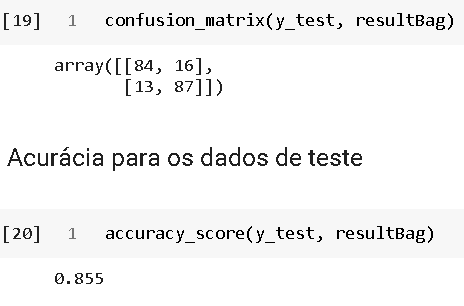

Em relação ao modelo desenvolvido na lista anterior, o modelo utilizando redes neurais teve um desempenho semelhante ao modelo de árvores Bagging. Mas, por depender de uma inicialização ótima dos pesos, o modelo MLP apresenta maior flutuação em seus resultados comparado ao Bagging. Apesar disso, ambos modelos apresentam resultados próximos.

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'activation':['relu','tanh','logistic'],'solver':['adam'], 'hidden_layer_sizes':[(8,8,8),(10,10,10),(8,8,8,8),(8,8)], 'max_iter':[500],
              'early_stopping':[True],'validation_fraction':[0.2],
              'shuffle':[True],'tol':[1e-1,1e-2,1e-3,1e-4,1e-5],'n_iter_no_change':[20,30]
}

mlp = MLPClassifier()
mlp1a = GridSearchCV(mlp, parameters)
mlp1a.fit(x_train,y_train)
print(mlp1a.best_params_)
print("Treino\n")
predictions = mlp1a.predict(x_train)
print(confusion_matrix(y_train,predictions))
print(classification_report(y_train,predictions))
print("\nTeste\n")
predictions = mlp1a.predict(x_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

{'activation': 'tanh', 'early_stopping': True, 'hidden_layer_sizes': (10, 10, 10), 'max_iter': 500, 'n_iter_no_change': 30, 'shuffle': True, 'solver': 'adam', 'tol': 0.001, 'validation_fraction': 0.2}
Treino

[[333  67]
 [ 49 351]]
              precision    recall  f1-score   support

           1       0.87      0.83      0.85       400
           2       0.84      0.88      0.86       400

    accuracy                           0.85       800
   macro avg       0.86      0.85      0.85       800
weighted avg       0.86      0.85      0.85       800


Teste

[[79 21]
 [16 84]]
              precision    recall  f1-score   support

           1       0.83      0.79      0.81       100
           2       0.80      0.84      0.82       100

    accuracy                           0.81       200
   macro avg       0.82      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200

